In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('exam_pass_fail_dataset.csv')

In [42]:
data.iloc[0]

Age                      0.000000
Gender                   1.000000
Hours_Studied            0.533333
Attendance_Percentage    0.615385
Quiz_Score               0.272727
Exam_Prep_Days           0.166667
Stress_Level             0.000000
Parental_Support         0.000000
Pass_Fail                1.000000
Name: 0, dtype: float64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    100 non-null    int64  
 1   Gender                 100 non-null    int64  
 2   Hours_Studied          100 non-null    float64
 3   Attendance_Percentage  100 non-null    int64  
 4   Quiz_Score             100 non-null    int64  
 5   Exam_Prep_Days         100 non-null    int64  
 6   Stress_Level           100 non-null    int64  
 7   Parental_Support       100 non-null    int64  
 8   Pass_Fail              100 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 7.2 KB


In [9]:
data.isnull().sum()

Age                      0
Gender                   0
Hours_Studied            0
Attendance_Percentage    0
Quiz_Score               0
Exam_Prep_Days           0
Stress_Level             0
Parental_Support         0
Pass_Fail                0
dtype: int64

In [15]:
data.head(5)

,Age,Gender,Hours_Studied,Attendance_Percentage,Quiz_Score,Exam_Prep_Days,Stress_Level,Parental_Support,Pass_Fail
0,18,1,2.9,84,62,2,1,0,1
1,20,0,2.8,99,72,4,5,0,0
2,19,0,3.4,60,74,5,7,1,0
3,18,0,1.6,75,84,5,6,0,0
4,18,1,3.2,98,90,5,1,1,0


In [21]:
data.describe()

,Age,Gender,Hours_Studied,Attendance_Percentage,Quiz_Score,Exam_Prep_Days,Stress_Level,Parental_Support,Pass_Fail
count,100.000000,100.00,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,19.510000,0.55,2.614000,81.210000,72.140000,3.820000,4.560000,0.480000,0.520000
std,1.159023,0.50,1.300351,11.711425,13.014382,1.961138,2.519901,0.502117,0.502117
min,18.000000,0.00,0.500000,60.000000,50.000000,1.000000,1.000000,0.000000,0.000000
25%,18.000000,0.00,1.600000,71.000000,61.000000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,1.00,2.500000,83.000000,71.500000,4.000000,5.000000,0.000000,1.000000
75%,21.000000,1.00,3.600000,91.250000,84.250000,5.000000,6.000000,1.000000,1.000000
max,21.000000,1.00,5.000000,99.000000,94.000000,7.000000,9.000000,1.000000,1.000000


In [11]:
data.mean()

Age                      19.510
Gender                    0.550
Hours_Studied             2.614
Attendance_Percentage    81.210
Quiz_Score               72.140
Exam_Prep_Days            3.820
Stress_Level              4.560
Parental_Support          0.480
Pass_Fail                 0.520
dtype: float64

In [22]:
correlation = data.corr()
correlation["Pass_Fail"].sort_values(ascending = False)

Pass_Fail                1.000000
Gender                   0.136795
Parental_Support         0.121795
Quiz_Score               0.100040
Attendance_Percentage    0.087741
Exam_Prep_Days           0.003693
Stress_Level            -0.064824
Age                     -0.113166
Hours_Studied           -0.158230
Name: Pass_Fail, dtype: float64

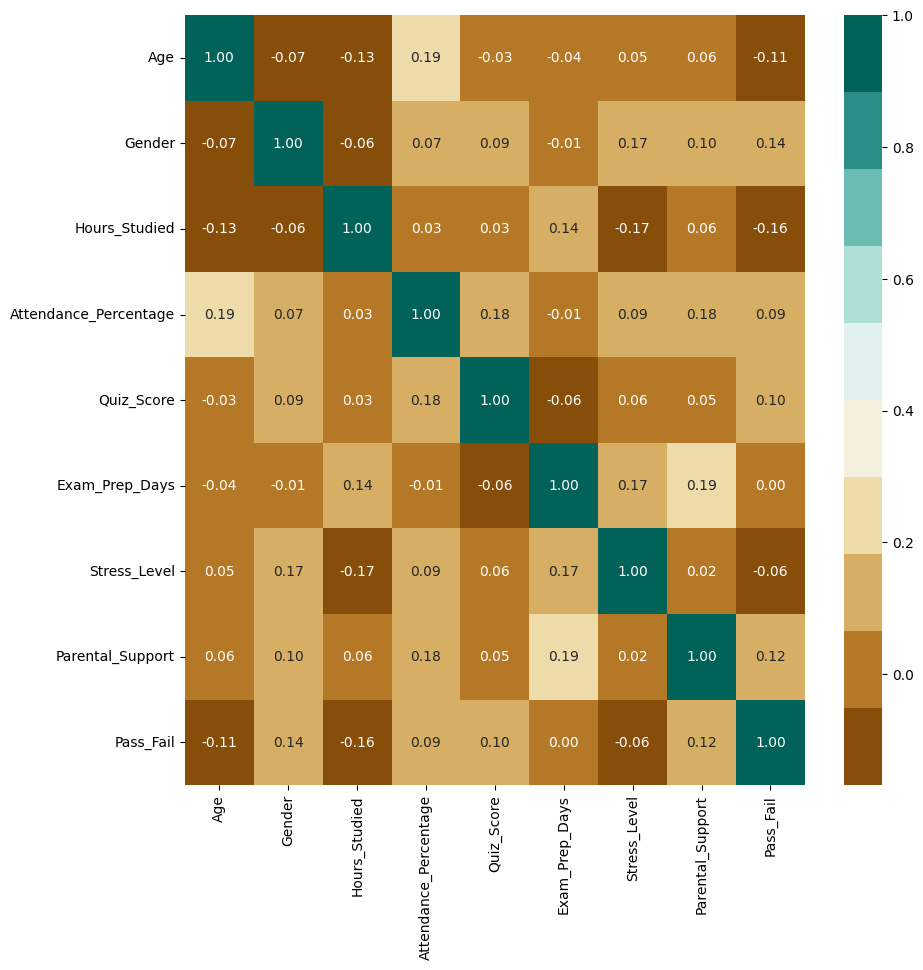

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlation, cmap=colormap, annot=True, fmt=".2f")

ax.set_yticklabels(correlation.columns); #chatGPT help find columns

plt.show()

In [105]:
def min_max_scale_column(column):
    # scale values between 0 and 1 for each column
    min_value = column.min()
    max_value = column.max()
    return(column - min_value)/(max_value - min_value)

In [106]:
data = data.apply(min_max_scale_column)

In [107]:
data.describe()

,Age,Gender,Hours_Studied,Attendance_Percentage,Quiz_Score,Exam_Prep_Days,Stress_Level,Parental_Support,Pass_Fail
count,100.000000,100.00,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.503333,0.55,0.469778,0.543846,0.503182,0.470000,0.445000,0.480000,0.520000
std,0.386341,0.50,0.288967,0.300293,0.295781,0.326856,0.314988,0.502117,0.502117
min,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00,0.244444,0.282051,0.250000,0.166667,0.125000,0.000000,0.000000
50%,0.666667,1.00,0.444444,0.589744,0.488636,0.500000,0.500000,0.000000,1.000000
75%,1.000000,1.00,0.688889,0.801282,0.778409,0.666667,0.625000,1.000000,1.000000
max,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [126]:
dataShuffled = data.sample(frac=1, random_state = 37)
dataShuffled

,Age,Gender,Hours_Studied,Attendance_Percentage,Quiz_Score,Exam_Prep_Days,Stress_Level,Parental_Support,Pass_Fail
61,0.333333,1.0,0.577778,0.230769,0.840909,0.666667,0.875,0.0,0.0
49,0.000000,1.0,0.422222,0.487179,0.363636,0.500000,0.250,0.0,1.0
86,1.000000,1.0,0.044444,0.923077,0.613636,0.666667,0.250,1.0,1.0
78,0.000000,1.0,0.844444,0.076923,0.590909,1.000000,0.875,1.0,0.0
5,0.000000,1.0,0.977778,0.102564,0.659091,1.000000,0.500,1.0,1.0
...,...,...,...,...,...,...,...,...,...
22,0.333333,0.0,0.755556,0.641026,0.409091,1.000000,0.000,1.0,0.0
53,0.333333,1.0,0.000000,0.820513,0.886364,0.000000,0.625,0.0,1.0
92,1.000000,1.0,0.088889,0.435897,0.000000,0.333333,0.625,1.0,1.0
76,0.333333,1.0,0.955556,0.846154,0.977273,0.666667,0.875,1.0,0.0


In [127]:
splitIndex = int(0.8*len(dataShuffled))
splitIndex

80

In [128]:
trainData = dataShuffled[:splitIndex]
testData = dataShuffled[splitIndex:]

In [129]:
perceptron = Perceptron()

In [130]:
featureDataTrain = trainData.iloc[:,:-1] # all but last column for features
featureTargetTrain = trainData.iloc[:,-1] #last column for target

In [131]:
perceptron.fit(featureDataTrain, featureTargetTrain)

Perceptron()

In [132]:
#display weightings
for feature, weight in zip(featureDataTrain, perceptron.coef_[0]):
    print(feature, weight)
print("Bias: ", perceptron.intercept_[0])

Age -2.6666666666666647
Gender 1.0
Hours_Studied -0.6222222222222276
Attendance_Percentage 0.9743589743589756
Quiz_Score 2.2727272727272716
Exam_Prep_Days 1.8333333333333326
Stress_Level -0.75
Parental_Support 1.0
Bias:  0.0


In [133]:
featureDataTest = testData.iloc[:, :-1]
featureTargetTest = testData.iloc[:,-1]

testPredictions = perceptron.predict(featureDataTest)

In [134]:
#accuracy
accuracy = accuracy_score(featureTargetTest, testPredictions)
print(f"Accuracy: {accuracy: .2f}")

Accuracy:  0.50


In [140]:
#classification report
cr = classification_report(featureTargetTest, testPredictions)
print(cr)

              precision    recall  f1-score   support

         0.0       0.20      0.14      0.17         7
         1.0       0.60      0.69      0.64        13

    accuracy                           0.50        20
   macro avg       0.40      0.42      0.40        20
weighted avg       0.46      0.50      0.48        20



In [144]:
#confustion matrix
cm = confusion_matrix(featureTargetTest, testPredictions)
print(cm)

[[1 6]
 [4 9]]


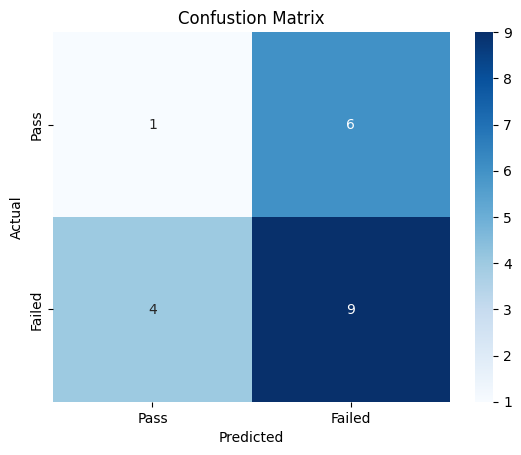

In [151]:
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d', xticklabels=["Pass", "Failed"],
            yticklabels = ["Pass", "Failed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confustion Matrix")
plt.show()

In [152]:
for feature, weight in zip(featureDataTrain, perceptron.coef_[0]):
    print(feature, weight)
print("Bias: ", perceptron.intercept_[0])

Age -2.6666666666666647
Gender 1.0
Hours_Studied -0.6222222222222276
Attendance_Percentage 0.9743589743589756
Quiz_Score 2.2727272727272716
Exam_Prep_Days 1.8333333333333326
Stress_Level -0.75
Parental_Support 1.0
Bias:  0.0


# Model Interpretation

The three features with the highest weight are age, quiz scores, and exam prep days. If you are older you were less likey to pass. If you had higher quiz scores you were more likely to pass. If you had more exam prep days you were more likely to pass.

# Reflection Questions

1. How does the accuracy of your perceptron model on this student dataset compare to the credit application example from class? Why might there be differences?

    My model was less accurate than the credit application example. This could be due to the data size.
    
2. Which features were most predictive of student success? Do these align with your intuitions about factors that might influence exam performance?

    The most predictive feature of student success was the age, quiz score, and amount of exam prep days. The one to surprise me was age, however, as I thought more this could be due to the increased difficulty in the test as you age. 

3. Compare the correlation heatmap with the weights learned by the perceptron. Are the most correlated features also the ones with the highest weights? Why or why not?

    There were correlations with the heatmap and the weights for age and quiz score but not exam prep days. This could be due to the way the trained data was chosen.

4. How did the min-max scaling affect the model's ability to learn? Why is normalization important for this type of model?

    Min-max scaling affected the model by rescaling the data to a fixed range, the range being between 0 and 1. This is so that all the different features are working on the same scale. That is important so that one feature is not dominant over another. 

5. If you wanted to improve the model's performance, what modifications or additional techniques would you try?

    If I were to improve the model I would use K-fold cross validation. 

6. How would you use this model in a real educational setting? What ethical considerations should be taken into account?

    I would use this model in a real educational setting to see which students are at higher risk. That way I would help those students prepare more. The ethical consideration that should be taken into account is recognizing that this does not mean a guarantee to fail, therefore, they should not be treated as such. 

In [167]:
#Bonus
dataShuffled = data.sample(frac=1, random_state = 37)
dataShuffled

,Age,Gender,Hours_Studied,Attendance_Percentage,Quiz_Score,Exam_Prep_Days,Stress_Level,Parental_Support,Pass_Fail
61,0.333333,1.0,0.577778,0.230769,0.840909,0.666667,0.875,0.0,0.0
49,0.000000,1.0,0.422222,0.487179,0.363636,0.500000,0.250,0.0,1.0
86,1.000000,1.0,0.044444,0.923077,0.613636,0.666667,0.250,1.0,1.0
78,0.000000,1.0,0.844444,0.076923,0.590909,1.000000,0.875,1.0,0.0
5,0.000000,1.0,0.977778,0.102564,0.659091,1.000000,0.500,1.0,1.0
...,...,...,...,...,...,...,...,...,...
22,0.333333,0.0,0.755556,0.641026,0.409091,1.000000,0.000,1.0,0.0
53,0.333333,1.0,0.000000,0.820513,0.886364,0.000000,0.625,0.0,1.0
92,1.000000,1.0,0.088889,0.435897,0.000000,0.333333,0.625,1.0,1.0
76,0.333333,1.0,0.955556,0.846154,0.977273,0.666667,0.875,1.0,0.0


In [236]:
splitIndex = int(0.5*len(dataShuffled))
splitIndex

50

In [237]:
trainData = dataShuffled[:splitIndex]
testData = dataShuffled[splitIndex:]

In [238]:
perceptron.fit(featureDataTrain, featureTargetTrain)

Perceptron(eta0=1e-05, max_iter=5000)

In [239]:
for feature, weight in zip(featureDataTrain, perceptron.coef_[0]):
    print(feature, weight)
print("Bias: ", perceptron.intercept_[0])

Age -1.666666666666668e-05
Gender 1.0000000000000004e-05
Hours_Studied -2.4888888888888937e-05
Attendance_Percentage 1.410256410256412e-05
Quiz_Score 1.2272727272727256e-05
Exam_Prep_Days 1.8333333333333323e-05
Stress_Level -5.000000000000023e-06
Parental_Support 3.0000000000000004e-05
Bias:  -1.0000000000000004e-05


In [240]:
featureDataTest = testData.iloc[:, :-1]
featureTargetTest = testData.iloc[:,-1]

testPredictions = perceptron.predict(featureDataTest)

In [241]:
#accuracy
accuracy = accuracy_score(featureTargetTest, testPredictions)
print(f"Accuracy: {accuracy: .2f}")

Accuracy:  0.60


In [242]:
#classification report
cr = classification_report(featureTargetTest, testPredictions)
print(cr)

              precision    recall  f1-score   support

         0.0       0.71      0.52      0.60        29
         1.0       0.52      0.71      0.60        21

    accuracy                           0.60        50
   macro avg       0.62      0.62      0.60        50
weighted avg       0.63      0.60      0.60        50



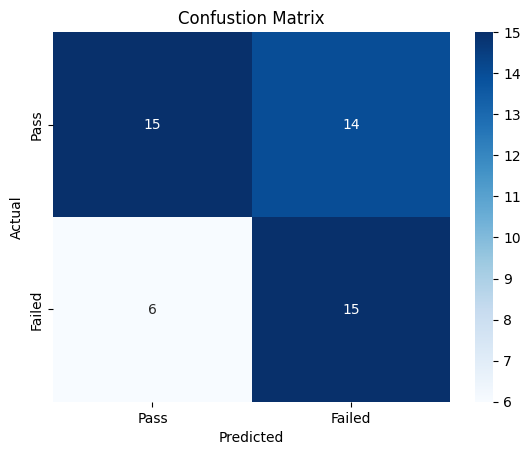

In [243]:
cm = confusion_matrix(featureTargetTest, testPredictions)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d', xticklabels=["Pass", "Failed"],
            yticklabels = ["Pass", "Failed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confustion Matrix")
plt.show()

### Notes:

I used a 50/50 split. since it wsa able to test more data it showed to be more percise. However, since it had less data to train with it was less accurate. 

In [244]:
#bonus 2
perceptron = Perceptron(eta0=0.00001, max_iter = 5000)

In [245]:
splitIndex = int(0.95*len(dataShuffled))
splitIndex

95

In [246]:
trainData = dataShuffled[:splitIndex]
testData = dataShuffled[splitIndex:]

In [247]:
perceptron.fit(featureDataTrain, featureTargetTrain)

Perceptron(eta0=1e-05, max_iter=5000)

In [248]:
for feature, weight in zip(featureDataTrain, perceptron.coef_[0]):
    print(feature, weight)
print("Bias: ", perceptron.intercept_[0])

Age -1.666666666666668e-05
Gender 1.0000000000000004e-05
Hours_Studied -2.4888888888888937e-05
Attendance_Percentage 1.410256410256412e-05
Quiz_Score 1.2272727272727256e-05
Exam_Prep_Days 1.8333333333333323e-05
Stress_Level -5.000000000000023e-06
Parental_Support 3.0000000000000004e-05
Bias:  -1.0000000000000004e-05


In [249]:
featureDataTest = testData.iloc[:, :-1]
featureTargetTest = testData.iloc[:,-1]

testPredictions = perceptron.predict(featureDataTest)

In [250]:
#accuracy
accuracy = accuracy_score(featureTargetTest, testPredictions)
print(f"Accuracy: {accuracy: .2f}")

Accuracy:  0.40


In [251]:
#classification report
cr = classification_report(featureTargetTest, testPredictions)
print(cr)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.50      0.67      0.57         3

    accuracy                           0.40         5
   macro avg       0.25      0.33      0.29         5
weighted avg       0.30      0.40      0.34         5



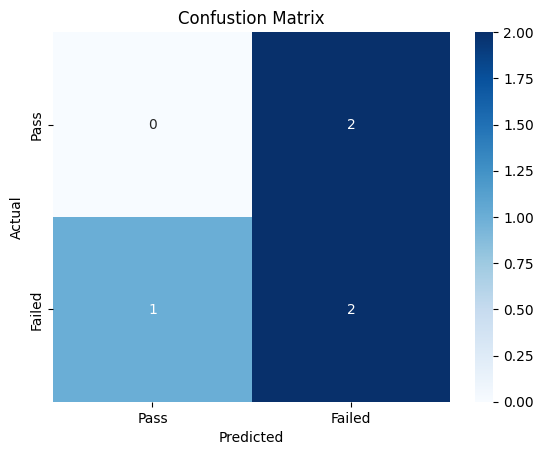

In [252]:
cm = confusion_matrix(featureTargetTest, testPredictions)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d', xticklabels=["Pass", "Failed"],
            yticklabels = ["Pass", "Failed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confustion Matrix")
plt.show()